## Importing the required modules

In [1]:
import cifar10
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import confusion_matrix, classification_report

## Downloading and importing the dataset

In [12]:
cifar10.data_path = "data/CIFAR-10/"
cifar10.maybe_download_and_extract()

- Download progress: 14.7%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



- Download progress: 35.4%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [2]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [3]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


## Visualizing first 20 images

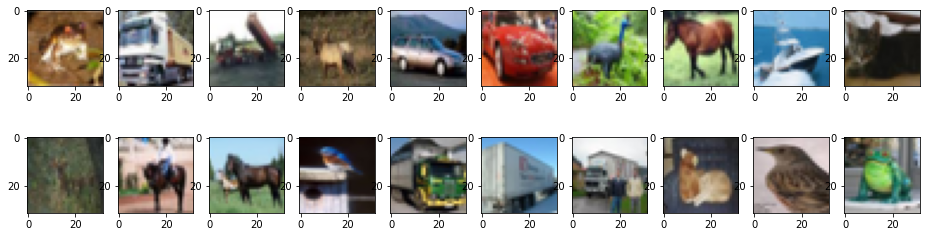

In [4]:
fig = plt.figure(figsize = (16,16))
for i in range(20):
    ax = fig.add_subplot(7, 10, i+1)
    ax.imshow(images_train[i])

plt.show()

## Vizualizing a single image, split into different channels

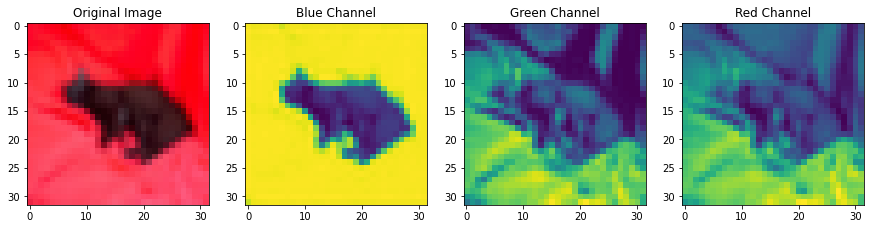

In [5]:
#Splitting into channels
blue,green,red = cv2.split(images_train[21])
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(141)
plt.title("Original Image")
plt.imshow(images_train[21])
fig.add_subplot(142)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(143)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(144)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

## Splitting all images into different channels

In [6]:
blue = []
green = []
red = []
for img in images_train:
    b,g,r = cv2.split(img)
    blue.append(b)
    green.append(g)
    red.append(r)
blue = np.array(blue)
green = np.array(green)
red = np.array(red)

In [7]:
test_blue = []
test_green = []
test_red = []
for img in images_test:
    b,g,r = cv2.split(img)
    test_blue.append(b)
    test_green.append(g)
    test_red.append(r)
test_blue = np.array(test_blue)
test_green = np.array(test_green)
test_red = np.array(test_red)

## Converting to 2D array

In [8]:
blue_data = blue.reshape(50000,1024)
green_data = green.reshape(50000,1024)
red_data = red.reshape(50000,1024)

red.shape, red_data.shape

((50000, 32, 32), (50000, 1024))

In [9]:
test_blue_data = test_blue.reshape(10000,1024)
test_green_data = test_green.reshape(10000,1024)
test_red_data = test_red.reshape(10000,1024)

test_red.shape, test_red_data.shape

((10000, 32, 32), (10000, 1024))

## Applying PCA to each channel

#### BLUE CHANNEL

In [10]:
pca_blue = PCA()
pca_blue.fit(blue_data)

k = 0
total = sum(pca_blue.explained_variance_)
currentSum = 0
while currentSum / total < 0.99:
    currentSum += pca_blue.explained_variance_[k]
    k += 1
k

429

 ### We are keeping 99% variance of the original data. So, even with 99% of the data, we reduced the number of features from 1024 to 429 only.

In [11]:
pca_blue2 = PCA(n_components = k, whiten = True)
transformed_data = pca_blue2.fit_transform(blue_data)
transformed_data.shape

(50000, 429)

In [12]:
train_blue = transformed_data
blue_test_pca = pca_blue2.transform(test_blue_data)
blue_approx = pca_blue2.inverse_transform(transformed_data)
blue_approx.shape

(50000, 1024)

In [13]:
## Trying to plot the images, but we need to reshape the data
blue_approx_images = blue_approx.reshape((50000, 32, 32))

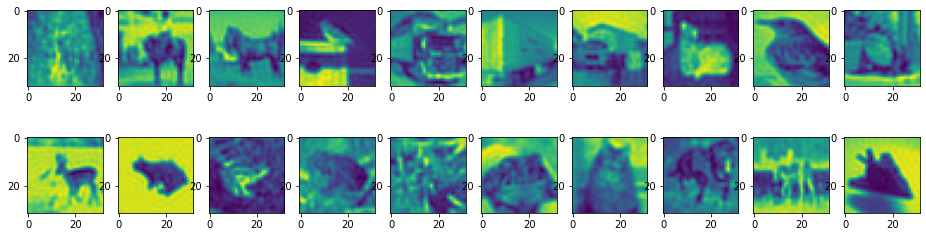

In [14]:
fig = plt.figure(figsize = (16,16))
for i in range(10, 30):
    ax = fig.add_subplot(7, 10, i+1)
    ax.imshow(blue_approx_images[i])

plt.show()

### Repeating for other channels too, one at a time

#### GREEN CHANNEL

In [15]:
pca_green = PCA()
pca_green.fit(green_data)

k = 0
total = sum(pca_green.explained_variance_)
currentSum = 0
while currentSum / total < 0.99:
    currentSum += pca_green.explained_variance_[k]
    k += 1
k

434

In [16]:
pca_green2 = PCA(n_components = k, whiten = True)
transformed_data = pca_green2.fit_transform(green_data)
transformed_data.shape

(50000, 434)

In [17]:
train_green = transformed_data
green_test_pca = pca_green2.transform(test_green_data)
green_approx = pca_green2.inverse_transform(transformed_data)
green_approx.shape

(50000, 1024)

In [18]:
## Trying to plot the images, but we need to reshape the data
green_approx_images = green_approx.reshape((50000, 32, 32))

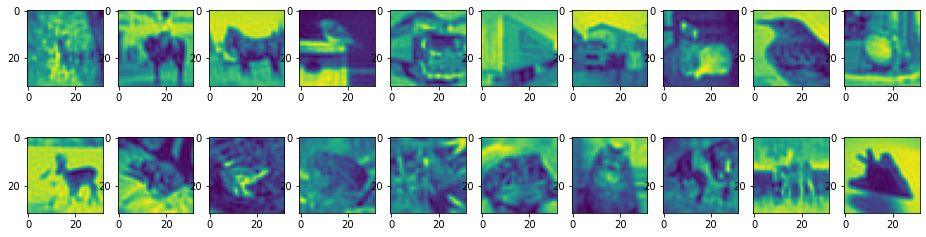

In [19]:
fig = plt.figure(figsize = (16,16))
for i in range(10, 30):
    ax = fig.add_subplot(7, 10, i+1)
    ax.imshow(green_approx_images[i])

plt.show()

#### RED CHANNEL

In [20]:
pca_red = PCA()
pca_red.fit(red_data)

k = 0
total = sum(pca_red.explained_variance_)
currentSum = 0
while currentSum / total < 0.99:
    currentSum += pca_red.explained_variance_[k]
    k += 1
k

405

In [21]:
pca_red2 = PCA(n_components = k, whiten = True)
transformed_data = pca_red2.fit_transform(red_data)
transformed_data.shape

(50000, 405)

In [22]:
train_red = transformed_data
red_test_pca = pca_red2.transform(test_red_data)
red_approx = pca_red2.inverse_transform(transformed_data)
red_approx.shape

(50000, 1024)

In [23]:
## Trying to plot the images, but we need to reshape the data
red_approx_images = red_approx.reshape((50000, 32, 32))

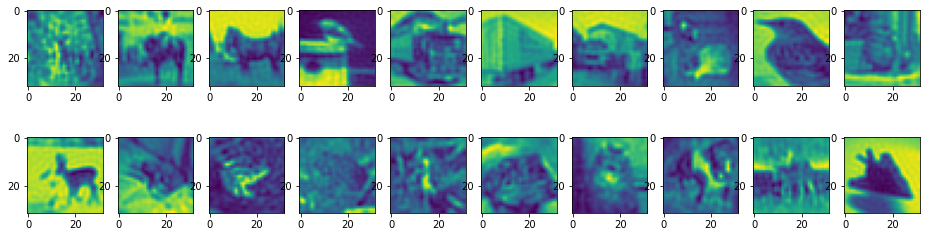

In [24]:
fig = plt.figure(figsize = (16,16))
for i in range(10, 30):
    ax = fig.add_subplot(7, 10, i+1)
    ax.imshow(red_approx_images[i])

plt.show()

### Plotting bar charts to check the explained variance ratio by each Eigenvalues separately for each of the 3 channels

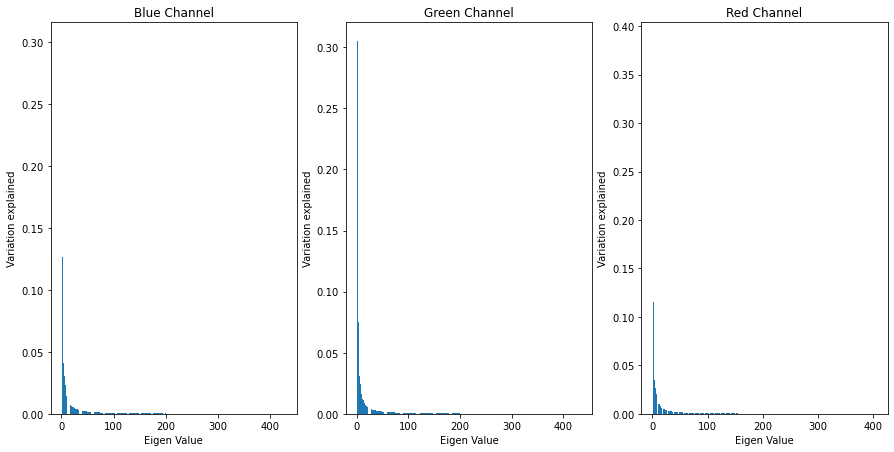

In [25]:
fig = plt.figure(figsize = (15, 7.2))

fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,430)),pca_blue2.explained_variance_ratio_)

fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,435)),pca_green2.explained_variance_ratio_)

fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,406)),pca_red2.explained_variance_ratio_)
# plt.bar(pca_red2.explained_variance_ratio_)
plt.show()

## Reconstructing the image and visualizing

In [26]:
i = 0
images_reduced = []
while i < 50000:
    images_reduced.append(cv2.merge((blue_approx_images[i], green_approx_images[i], red_approx_images[i])))
    i += 1

images_reduced = np.array(images_reduced)
print(images_reduced.shape)

(50000, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


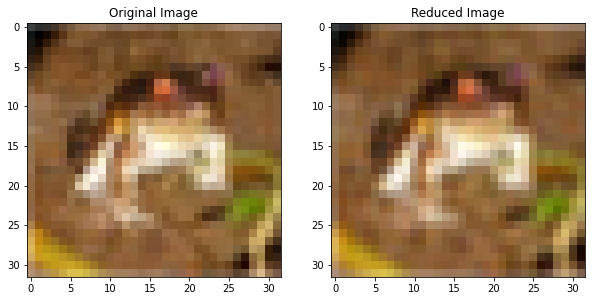

In [27]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(images_train[0])
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(images_reduced[0])
plt.show()

## Training a Random Forest Model for Classification of images

### Classifying through each channel differently then, taking the majority output

#### BLUE CHANNEL

In [29]:
rf_blue = ensemble.RandomForestClassifier()
rf_blue.fit(train_blue, cls_train)
blue_pred = rf_blue.predict(blue_test_pca)

In [30]:
print(classification_report(cls_test, blue_pred))
print(confusion_matrix(cls_test, blue_pred))

              precision    recall  f1-score   support

           0       0.31      0.24      0.27      1000
           1       0.34      0.44      0.39      1000
           2       0.26      0.28      0.27      1000
           3       0.19      0.17      0.18      1000
           4       0.26      0.26      0.26      1000
           5       0.32      0.31      0.32      1000
           6       0.36      0.32      0.34      1000
           7       0.32      0.27      0.29      1000
           8       0.42      0.50      0.45      1000
           9       0.37      0.39      0.38      1000

    accuracy                           0.32     10000
   macro avg       0.31      0.32      0.31     10000
weighted avg       0.31      0.32      0.31     10000

[[245  82 131  63 110  50  54  55 156  54]
 [ 42 438  16  39  29  26  51  61  87 211]
 [102  54 285  99 130  81  86  58  71  34]
 [ 65  76 124 172  96 165  86  96  57  63]
 [ 61  54 188  88 256  75 100  72  71  35]
 [ 43  50 102 158  70 312 

#### GREEN CHANNEL

In [31]:
rf_green = ensemble.RandomForestClassifier()
rf_green.fit(train_green, cls_train)
green_pred = rf_green.predict(green_test_pca)

In [32]:
print(classification_report(cls_test, green_pred))
print(confusion_matrix(cls_test, green_pred))

              precision    recall  f1-score   support

           0       0.36      0.35      0.36      1000
           1       0.35      0.42      0.38      1000
           2       0.27      0.27      0.27      1000
           3       0.22      0.18      0.20      1000
           4       0.26      0.27      0.27      1000
           5       0.30      0.28      0.29      1000
           6       0.36      0.35      0.36      1000
           7       0.36      0.30      0.33      1000
           8       0.44      0.47      0.46      1000
           9       0.37      0.45      0.40      1000

    accuracy                           0.33     10000
   macro avg       0.33      0.33      0.33     10000
weighted avg       0.33      0.33      0.33     10000

[[347  68 113  33  92  35  46  50 160  56]
 [ 37 419  21  50  33  35  61  43  72 229]
 [101  44 271  79 172  91  89  55  60  38]
 [ 67  64  97 182 110 172  98  86  37  87]
 [ 85  38 181  71 269  63 127  79  59  28]
 [ 60  41 116 182  77 282 

#### RED CHANNEL

In [33]:
rf_red = ensemble.RandomForestClassifier()
rf_red.fit(train_red, cls_train)
red_pred = rf_red.predict(red_test_pca)

In [34]:
print(classification_report(cls_test, red_pred))
print(confusion_matrix(cls_test, red_pred))

              precision    recall  f1-score   support

           0       0.43      0.49      0.46      1000
           1       0.37      0.46      0.41      1000
           2       0.25      0.19      0.22      1000
           3       0.24      0.20      0.22      1000
           4       0.35      0.36      0.35      1000
           5       0.32      0.32      0.32      1000
           6       0.40      0.42      0.41      1000
           7       0.34      0.26      0.29      1000
           8       0.46      0.51      0.49      1000
           9       0.39      0.43      0.41      1000

    accuracy                           0.36     10000
   macro avg       0.36      0.36      0.36     10000
weighted avg       0.36      0.36      0.36     10000

[[490  56  47  23  33  31  28  28 193  71]
 [ 36 461  23  54  23  50  34  58  80 181]
 [113  44 191 104 181 103 112  62  54  36]
 [ 73  76  99 199  74 205 109  63  29  73]
 [ 49  38 117  65 356  58 168  74  44  31]
 [ 68  72  87 152  84 322 

## Selecting the majority prediction output

In [35]:
def majority(x, y, z):
    if x == y or x == z:
        return x
    if y == z:
        return y
    return z

In [36]:
op_pred = []
opp = []
i = 0
while i < 10000:
    op = majority(blue_pred[i], green_pred[i], red_pred[i])
    opp.append(op)
    op_pred.append(class_names[op])
    i += 1

op_pred = np.array(op_pred, dtype = str)
op_pred[0:5]

array(['frog', 'automobile', 'ship', 'ship', 'frog'], dtype='<U10')

In [37]:
print(classification_report(cls_test, opp))
print(confusion_matrix(cls_test, opp))

              precision    recall  f1-score   support

           0       0.45      0.43      0.44      1000
           1       0.39      0.50      0.44      1000
           2       0.28      0.24      0.26      1000
           3       0.25      0.20      0.22      1000
           4       0.35      0.34      0.35      1000
           5       0.35      0.34      0.34      1000
           6       0.42      0.43      0.42      1000
           7       0.39      0.29      0.33      1000
           8       0.47      0.56      0.51      1000
           9       0.40      0.46      0.42      1000

    accuracy                           0.38     10000
   macro avg       0.37      0.38      0.38     10000
weighted avg       0.37      0.38      0.38     10000

[[434  63  75  25  49  28  35  29 193  69]
 [ 29 502  21  46  20  38  34  43  73 194]
 [102  47 244  88 155 102 116  52  63  31]
 [ 73  73  94 203  79 199 100  67  33  79]
 [ 43  38 135  67 344  53 159  74  55  32]
 [ 52  61  96 159  72 343 

## Storing the output

In [38]:
op_df = pd.DataFrame(opp)
op_df.to_csv('y_test_pred.csv', index = False, header = False)

In [40]:
opr = []
for i in cls_test:
    opr.append(class_names[i])

opr = np.array(opr)
opp_df = pd.DataFrame(opr)
opp_df.to_csv('y_test_pred2.csv', index = False, header = False)